# Plano de Trabalho: Lung Cancer Dataset (Kaggle)

## 1. Compreensão e exploração inicial
- Revisar a documentação e as colunas disponíveis.
- Calcular estatísticas básicas (média, mediana, desvio padrão, percentis).
- Visualizar distribuições das variáveis-chave (histogramas, boxplots).
- Analisar correlações entre variáveis numéricas e com a variável alvo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'train.csv'
df = pd.read_csv(path).iloc[:,2:]
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

In [3]:
numerico = df.select_dtypes(include = ['float64', 'int64'])
numerico.loc[:,'satisfaction'] = df.satisfaction

In [4]:
numerico.head()

Age  Flight Distance  Inflight wifi service  \
0   13              460                      3   
1   25              235                      3   
2   26             1142                      2   
3   25              562                      2   
4   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

In [5]:
numericos = numerico.sample(10000)

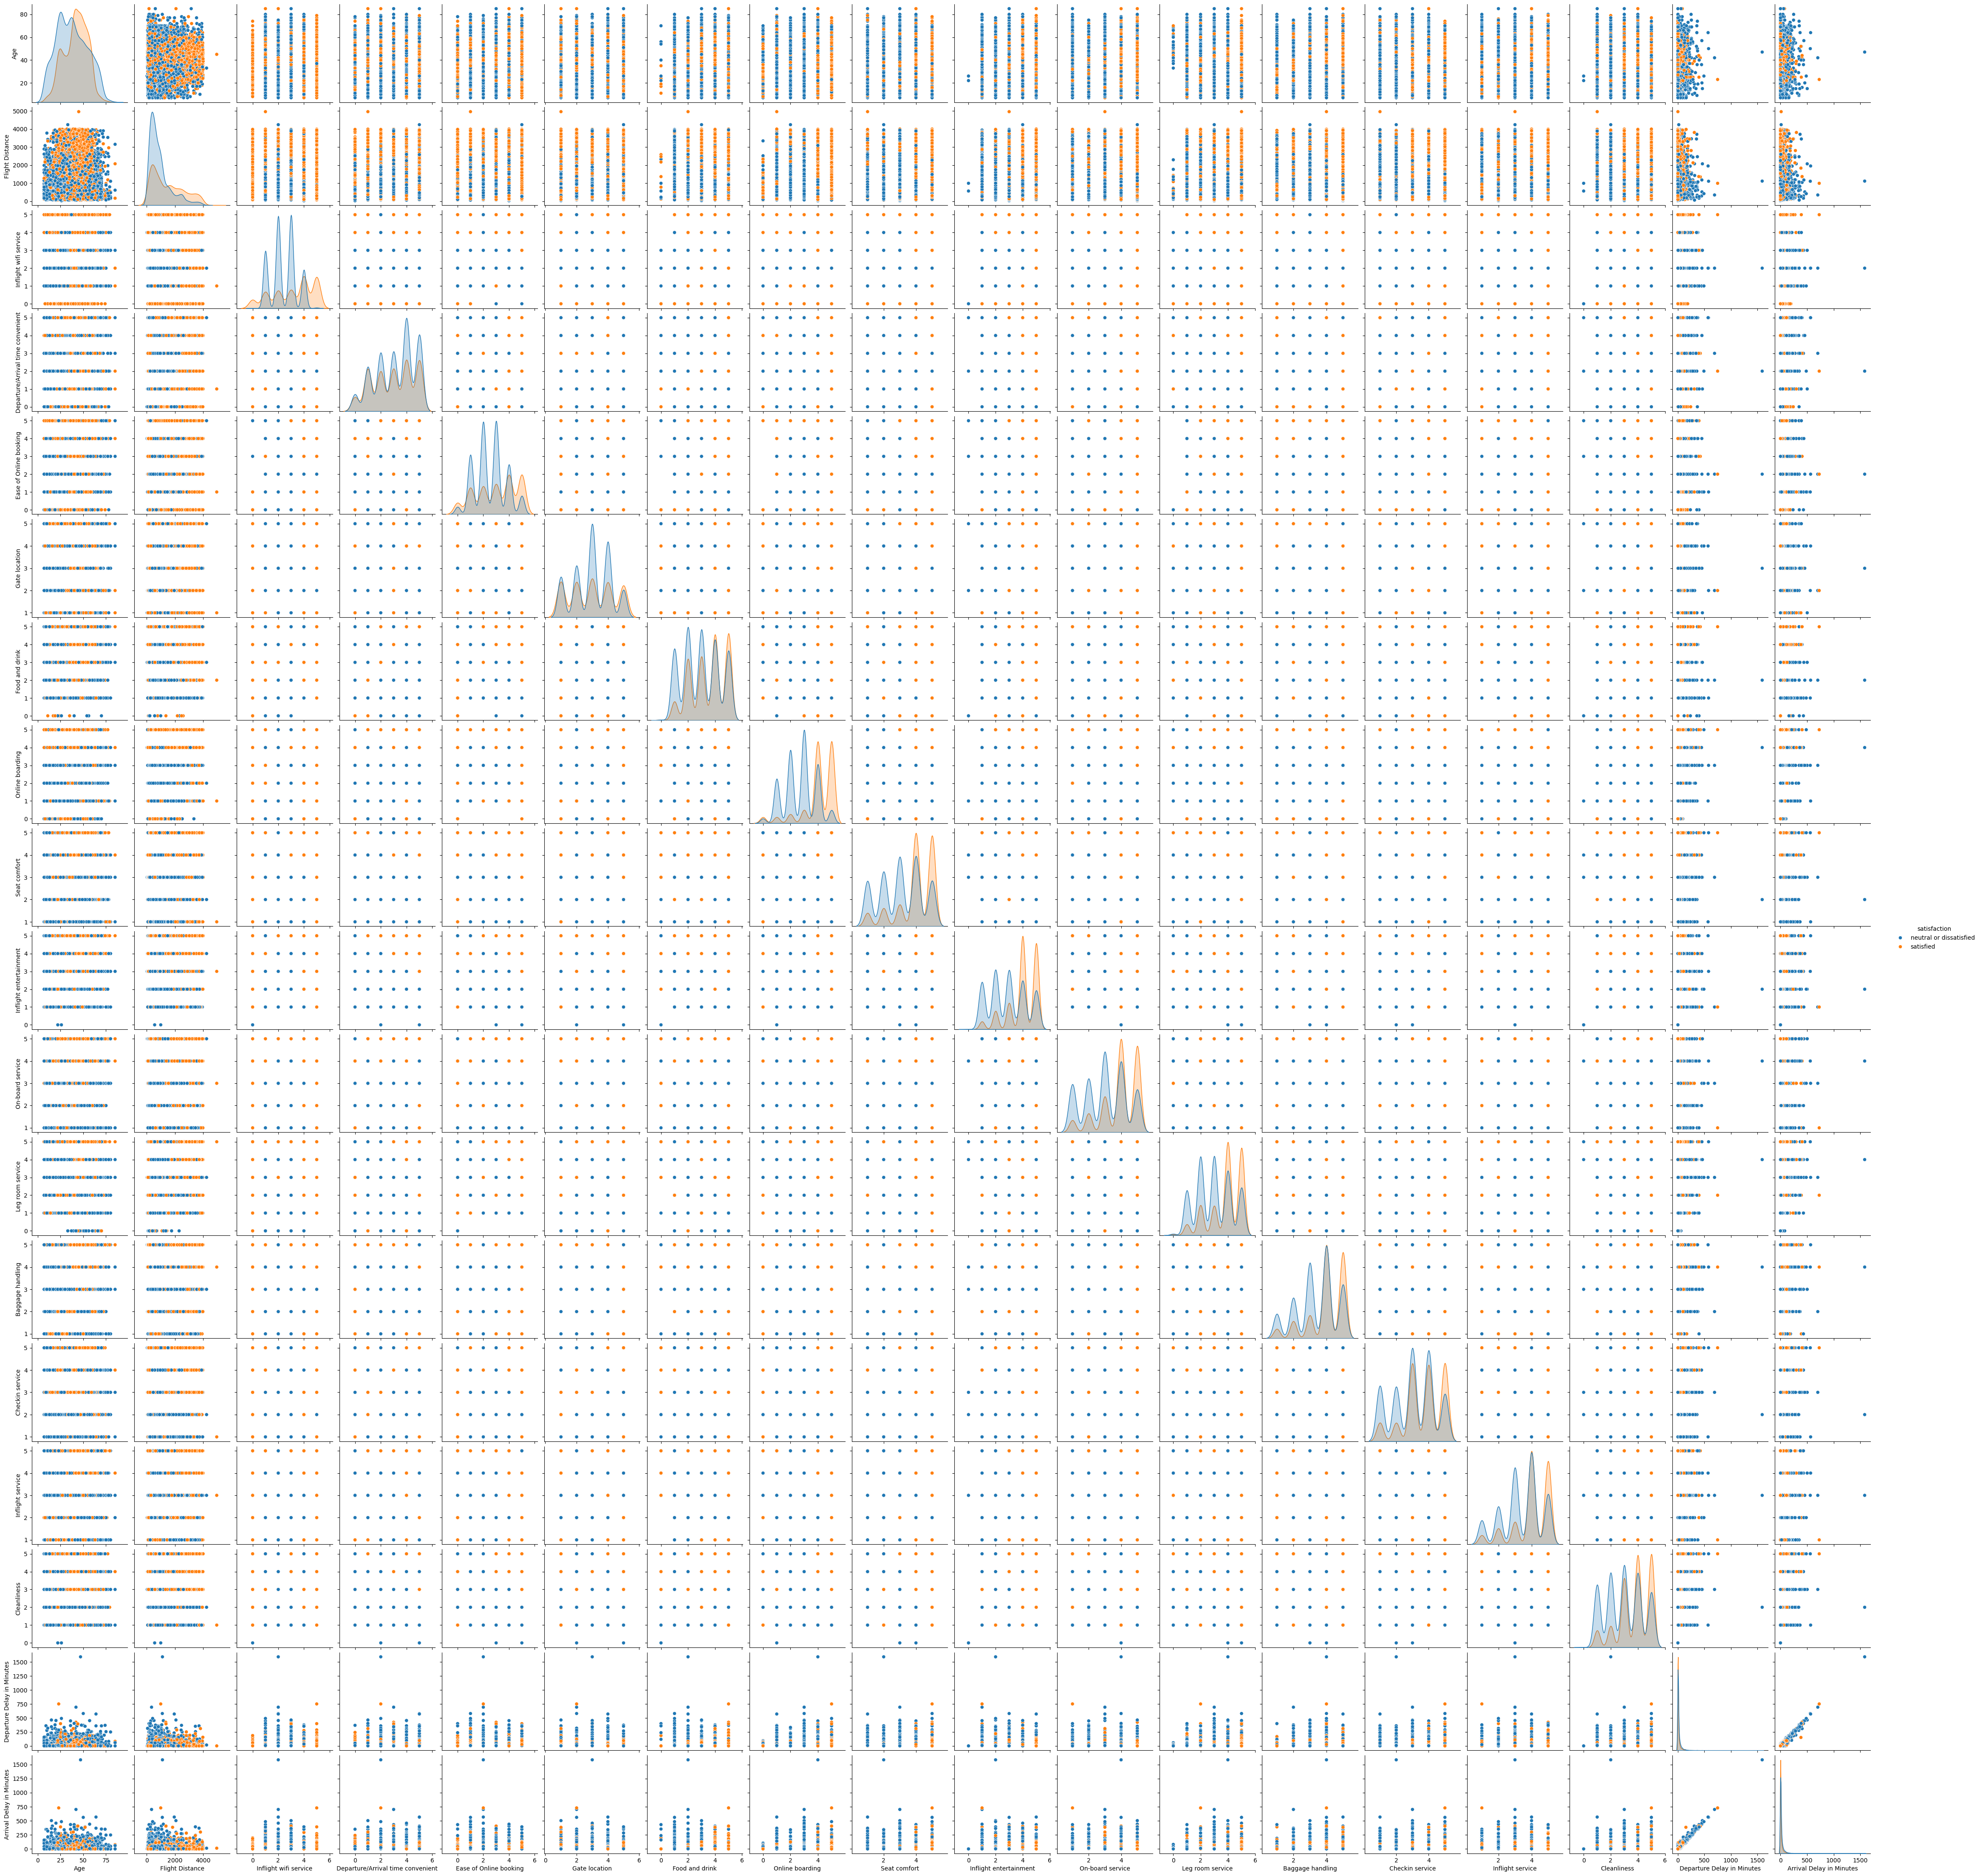

In [6]:
sns.pairplot(numericos,hue='satisfaction')

In [41]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

- nao há dados repetidos

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.sample(100000,random_state=42)

In [7]:
df['survived'] = df['survived'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['asthma'] = df['asthma'].astype('category')
df['cirrhosis'] = df['cirrhosis'].astype('category')
df['other_cancer'] = df['other_cancer'].astype('category')
df['treatment_type'] = df['treatment_type'].astype('object')

- variaveis tipo object para date diagnosis_date, end_treatment_date, e criamos uma nova variavel tempo_de_tratamento

- As variaveis diagnosis_date e end_treatment_date, por elas mesmas só indicam o tempo de inicio e do fim do tratamento 
  mas é mais importante a duracao do tratamento por isso é que criamos a variavel treatment duration

In [8]:
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'] )
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])
time = ((df['end_treatment_date'] - df['diagnosis_date']).dt.days).map(lambda x : int(x))
df.insert(3, 'treatment duration', time)
df['treatment duration'] = pd.to_numeric(df['treatment duration'], errors='coerce')

df.head()

age  gender    country  treatment duration diagnosis_date  \
773684  37.0    Male  Lithuania                 594     2015-09-30   
278119  63.0  Female    Hungary                 618     2024-04-01   
810422  63.0  Female    Belgium                 565     2015-05-08   
443587  71.0    Male    Denmark                 623     2014-10-05   
701478  45.0  Female     Cyprus                 576     2015-07-05   

       cancer_stage family_history  smoking_status   bmi  cholesterol_level  \
773684     Stage II             No  Current Smoker  34.5                241   
278119    Stage III             No  Passive Smoker  22.2                162   
810422    Stage III             No   Former Smoker  22.8                230   
443587     Stage II             No    Never Smoked  32.1                293   
701478      Stage I             No  Current Smoker  29.0                173   

       hypertension asthma cirrhosis other_cancer treatment_type  \
773684            0      0         0            0        Surgery   
278119            1      1         0            0       Combined   
810422            0      0         1            0       Combined   
443587            0      0         0            0   Chemotherapy   
701478            1      0         0            0        Surgery   

       end_treatment_date survived  
773684         2017-05-16        0  
278119         2025-12-10        0  
810422         2016-11-23        1  
443587         2016-06-19        1  
701478         2017-01-31        0

- Removemos as variaveis diagnosis_date e end_treatment_date

In [9]:
df.drop(['diagnosis_date', 'end_treatment_date'], axis=1, inplace=True)
df.head()

age  gender    country  treatment duration cancer_stage  \
773684  37.0    Male  Lithuania                 594     Stage II   
278119  63.0  Female    Hungary                 618    Stage III   
810422  63.0  Female    Belgium                 565    Stage III   
443587  71.0    Male    Denmark                 623     Stage II   
701478  45.0  Female     Cyprus                 576      Stage I   

       family_history  smoking_status   bmi  cholesterol_level hypertension  \
773684             No  Current Smoker  34.5                241            0   
278119             No  Passive Smoker  22.2                162            1   
810422             No   Former Smoker  22.8                230            0   
443587             No    Never Smoked  32.1                293            0   
701478             No  Current Smoker  29.0                173            1   

       asthma cirrhosis other_cancer treatment_type survived  
773684      0         0            0        Surgery        0  
278119      1         0            0       Combined        0  
810422      0         1            0       Combined        1  
443587      0         0            0   Chemotherapy        1  
701478      0         0            0        Surgery        0

## visualização de dados

- A variavel country so representa uma quantidade de pessoas mas como nao existe outra variavel relacionada tipo qualidade
  de vida para representar melhor a informacao de country vamos observar como é a distribuicao com relacao ao target 

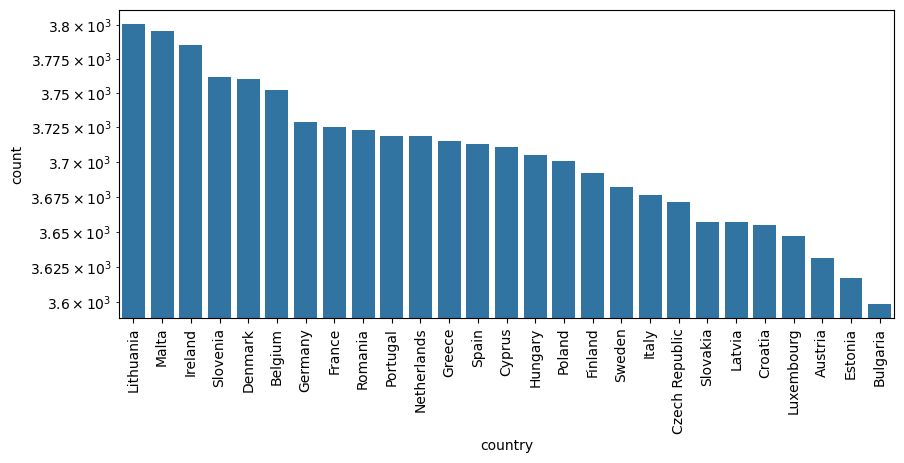

In [10]:
plt.figure(figsize=(10,4))
order = df['country'].value_counts().index
sns.countplot(x='country', data=df,order=order)
plt.yscale("log")
plt.xticks(rotation=90) 
plt.show()

-insight 1 : pode ser que variaveis geograficas sejam condicionantes para aumentar o numero de casos de
        cancer de pulmao mas essa informacao nao esta presente no dataset

/tmp/ipykernel_973886/3229905768.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = df.groupby(['country', 'survived']).size().unstack()


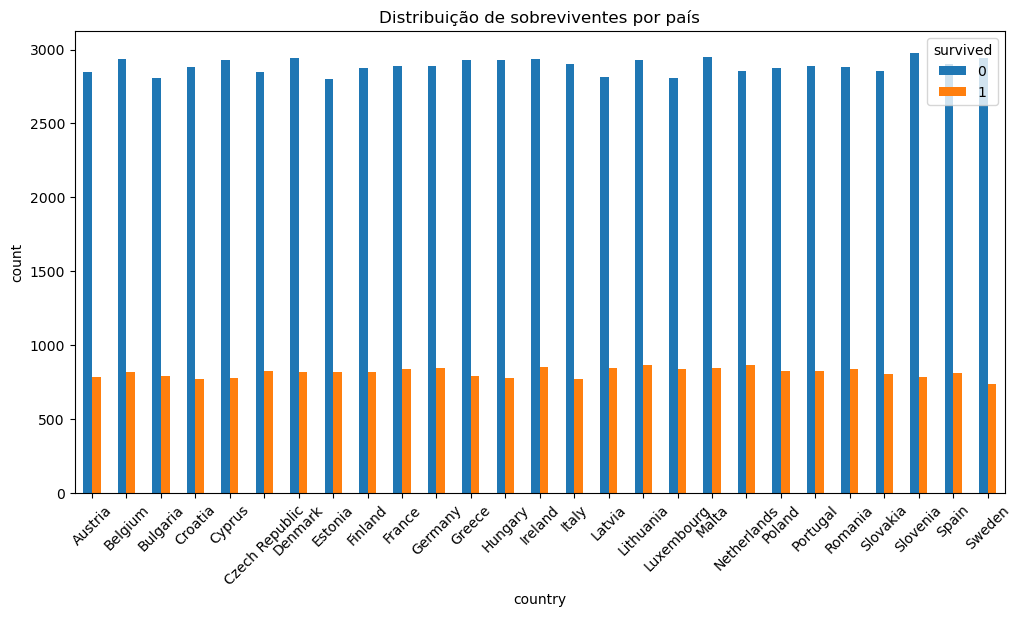

In [11]:
dist = df.groupby(['country', 'survived']).size().unstack()
dist.plot(kind='bar', figsize=(12,6))
plt.title("Distribuição de sobreviventes por país")
plt.xticks(rotation=45)
plt.ylabel("count")
plt.show()

- Observamos que em cada pais o nivel de desbalco da variabel alvo é parecido 

/tmp/ipykernel_973886/2357541182.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = df.groupby(['country', 'survived'])['age'].mean().unstack()


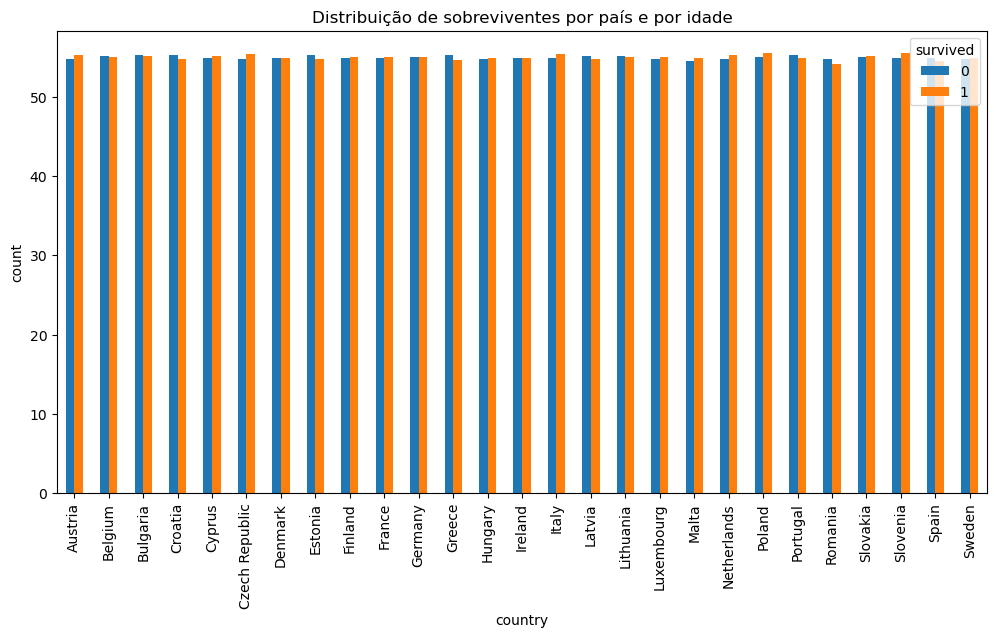

In [12]:
dist = df.groupby(['country', 'survived'])['age'].mean().unstack()
dist.plot(kind='bar', figsize=(12,6))
plt.title("Distribuição de sobreviventes por país e por idade")
plt.xticks(rotation=90)
plt.ylabel("count")
plt.show()

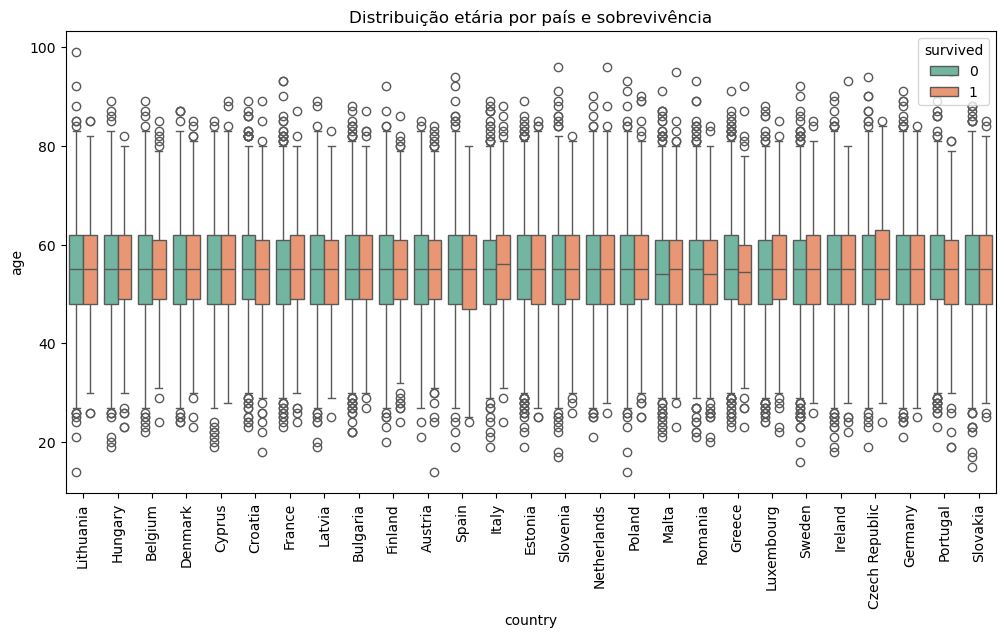

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="country", y="age", hue="survived", palette="Set2")
plt.title("Distribuição etária por país e sobrevivência")
plt.xticks(rotation=90)
plt.show()

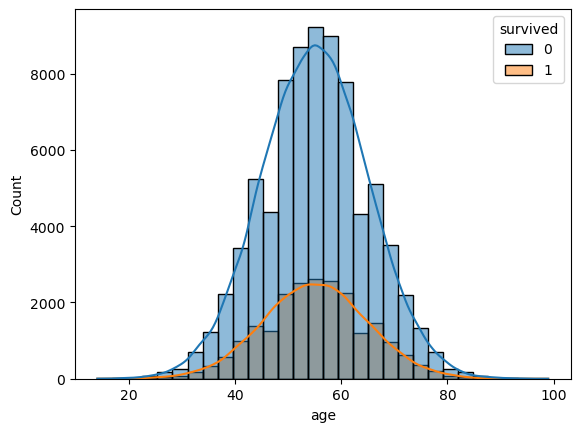

In [14]:
sns.histplot(data=df, x="age",hue='survived', bins=30, kde=True)
plt.show()

- Removemos a variavel country

In [15]:
df.drop(['country'], axis=1, inplace=True)
df.head()

age  gender  treatment duration cancer_stage family_history  \
773684  37.0    Male                 594     Stage II             No   
278119  63.0  Female                 618    Stage III             No   
810422  63.0  Female                 565    Stage III             No   
443587  71.0    Male                 623     Stage II             No   
701478  45.0  Female                 576      Stage I             No   

        smoking_status   bmi  cholesterol_level hypertension asthma cirrhosis  \
773684  Current Smoker  34.5                241            0      0         0   
278119  Passive Smoker  22.2                162            1      1         0   
810422   Former Smoker  22.8                230            0      0         1   
443587    Never Smoked  32.1                293            0      0         0   
701478  Current Smoker  29.0                173            1      0         0   

       other_cancer treatment_type survived  
773684            0        Surgery        0  
278119            0       Combined        0  
810422            0       Combined        1  
443587            0   Chemotherapy        1  
701478            0        Surgery        0

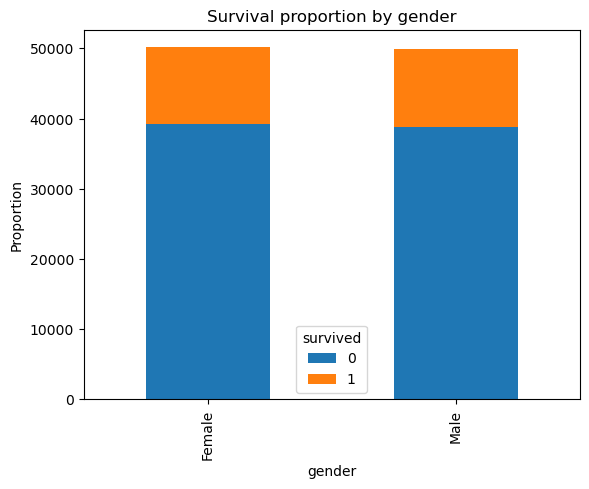

In [16]:
ct = pd.crosstab(df['gender'], df['survived'])
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by gender")
plt.ylabel("Proportion")
plt.show()

- observamos a dist de o tempo de tratamento 

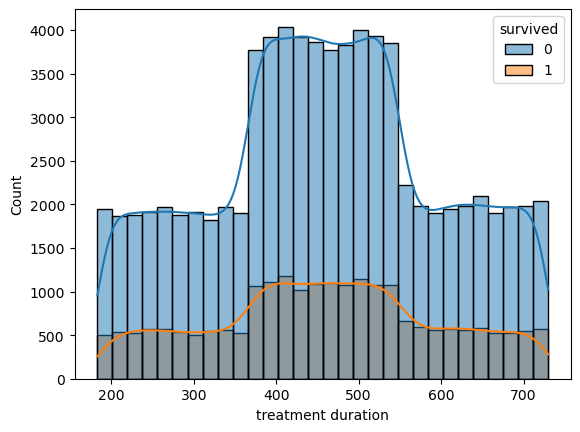

In [17]:
sns.histplot(data=df, x="treatment duration",hue='survived', bins=30, kde=True)
plt.show()

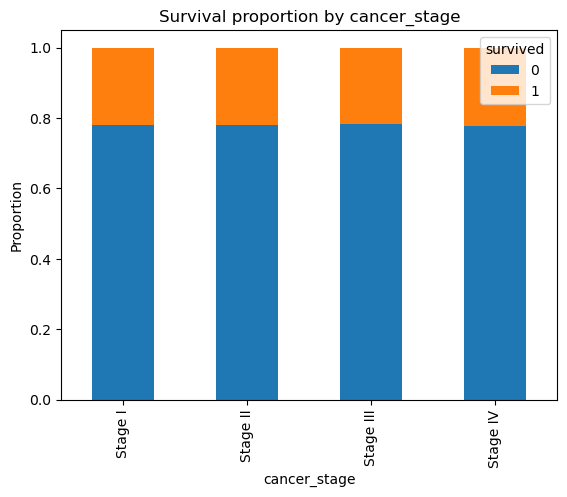

In [18]:
ct = pd.crosstab(df['cancer_stage'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by cancer_stage")
plt.ylabel("Proportion")
plt.show()

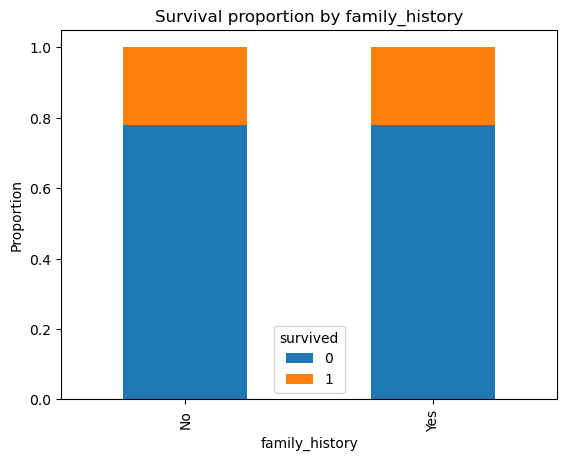

In [19]:
ct = pd.crosstab(df['family_history'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by family_history")
plt.ylabel("Proportion")
plt.show()

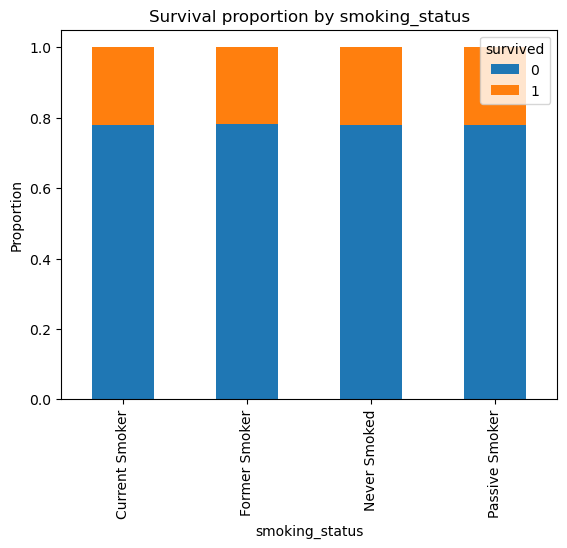

In [20]:
ct = pd.crosstab(df['smoking_status'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by smoking_status")
plt.ylabel("Proportion")
plt.show()

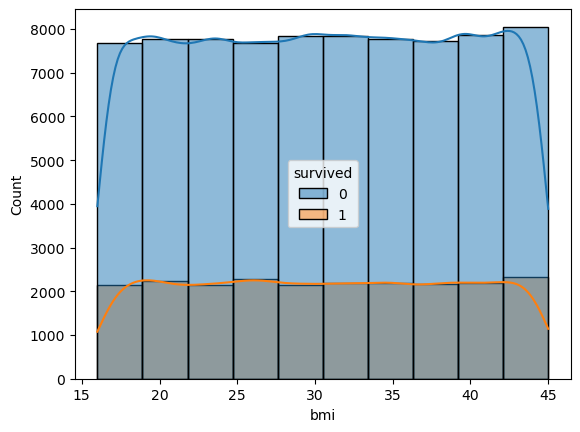

In [21]:
sns.histplot(data=df, x="bmi",hue='survived', bins=10, kde=True)
plt.show()

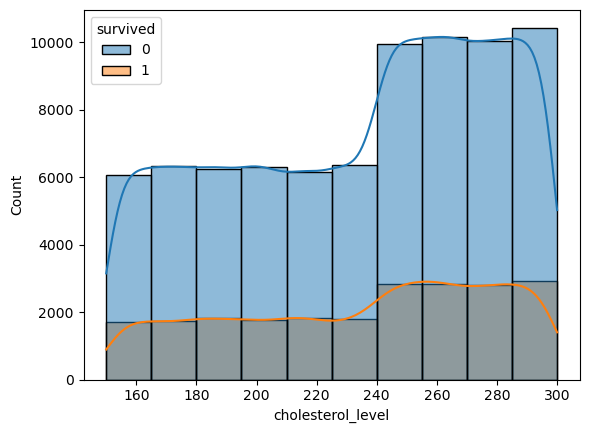

In [22]:
sns.histplot(data=df, x="cholesterol_level",hue='survived', bins=10, kde=True)
plt.show()

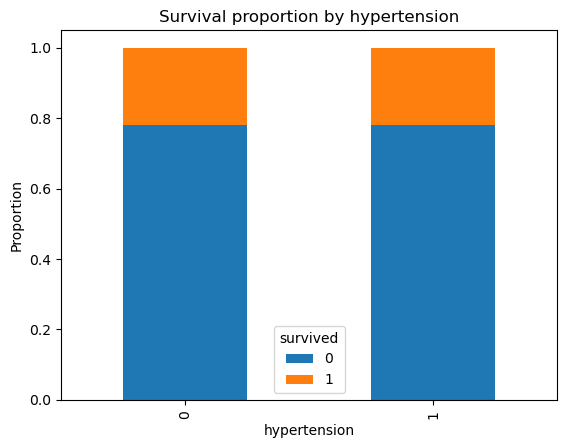

In [23]:
ct = pd.crosstab(df['hypertension'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by hypertension")
plt.ylabel("Proportion")
plt.show()

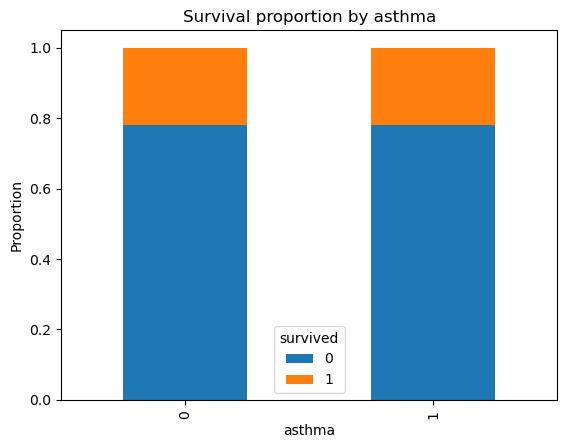

In [24]:
ct = pd.crosstab(df['asthma'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by asthma")
plt.ylabel("Proportion")
plt.show()

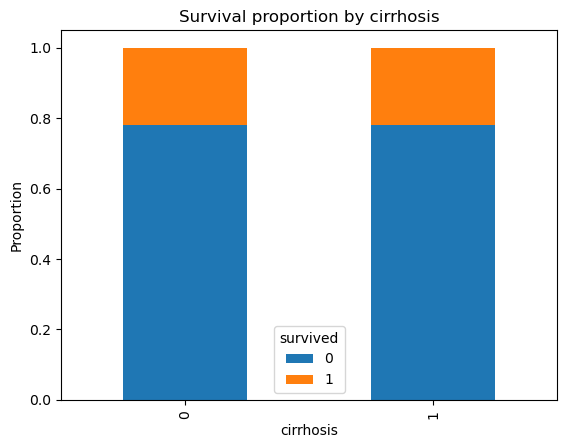

In [25]:
ct = pd.crosstab(df['cirrhosis'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by cirrhosis")
plt.ylabel("Proportion")
plt.show()

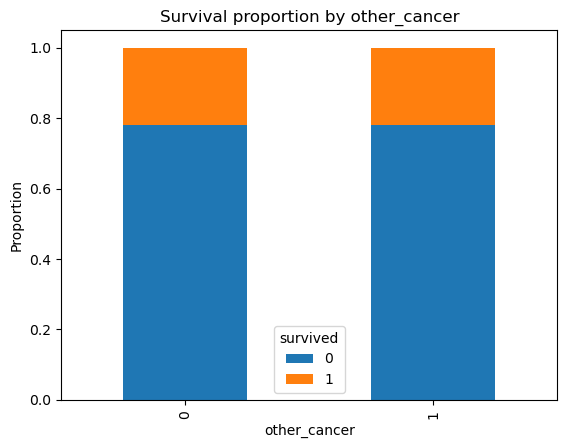

In [26]:
ct = pd.crosstab(df['other_cancer'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by other_cancer")
plt.ylabel("Proportion")
plt.show()

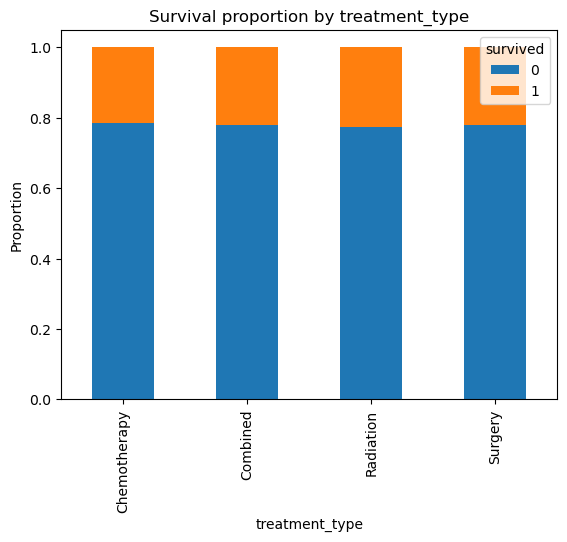

In [27]:
ct = pd.crosstab(df['treatment_type'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by treatment_type")
plt.ylabel("Proportion")
plt.show()

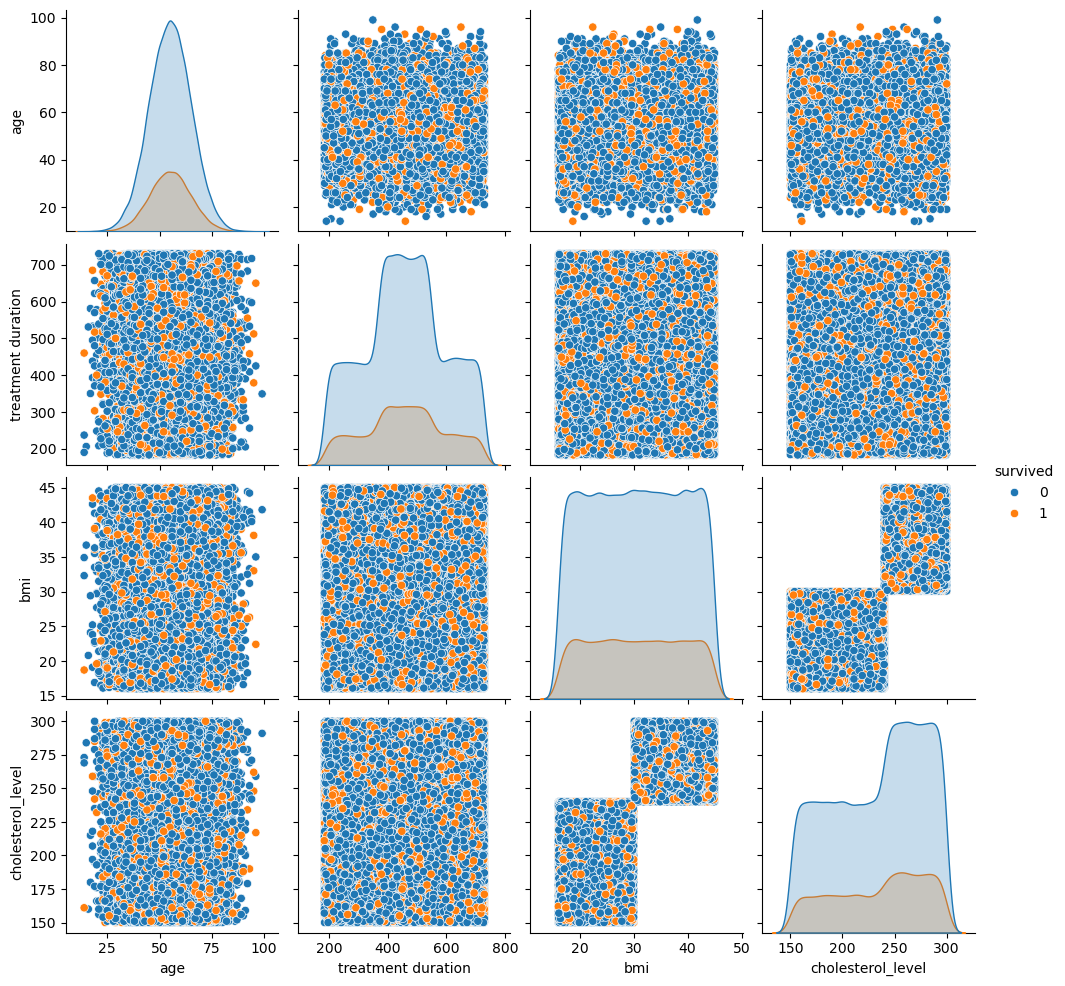

In [28]:
df_numeric = df.select_dtypes(include="number").columns
sns.pairplot(df,vars=df_numeric,hue='survived')


In [31]:
df.survived.value_counts()

survived
0    78003
1    21997
Name: count, dtype: int64

In [ ]:
#https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download&select=train.csv

<Axes: xlabel='survived', ylabel='count'>

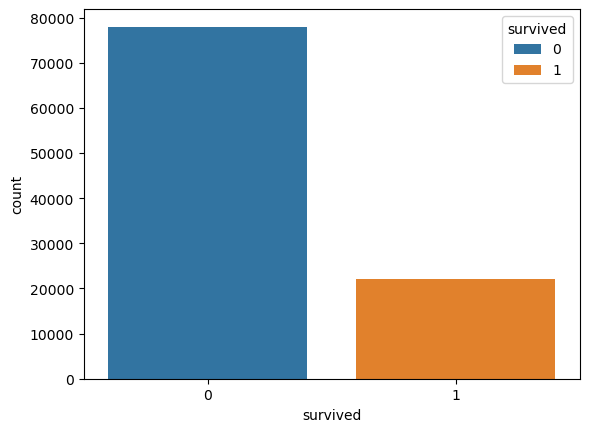

In [29]:
#df.survived.value_counts().plot(kind='bar')
sns.countplot(data=df,x='survived',hue='survived')

## Tratamento de dados

In [125]:
df.reset_index(drop=True, inplace=True)
stages = {'Stage II':2.0, 'Stage III':3.0, 'Stage I':1.0, 'Stage IV':4.0}
genders = {'Male':1.0,'Female':0.0}
history = {'No':0.0, 'Yes':1.0}
smoking = {'Passive Smoker':2.0, 'Former Smoker':1.0, 'Never Smoked':0.0,
       'Current Smoker':3.0}

df['cancer_stage'] = df['cancer_stage'].map(stages).astype('category')
df['gender'] = df['gender'].map(genders).astype('category')
df['family_history'] = df['family_history'].map(history).astype('category')
df['smoking_status'] = df['smoking_status'].map(smoking).astype('category')

df.head()

age gender  treatment duration cancer_stage family_history smoking_status  \
0  37.0    1.0                 594          2.0            0.0            3.0   
1  63.0    0.0                 618          3.0            0.0            2.0   
2  63.0    0.0                 565          3.0            0.0            1.0   
3  71.0    1.0                 623          2.0            0.0            0.0   
4  45.0    0.0                 576          1.0            0.0            3.0   

    bmi  cholesterol_level hypertension asthma cirrhosis other_cancer  \
0  34.5                241            0      0         0            0   
1  22.2                162            1      1         0            0   
2  22.8                230            0      0         1            0   
3  32.1                293            0      0         0            0   
4  29.0                173            1      0         0            0   

  treatment_type survived  
0        Surgery        0  
1       Combined        0  
2       Combined        1  
3   Chemotherapy        1  
4        Surgery        0

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   age                 100000 non-null  float64 
 1   gender              100000 non-null  category
 2   treatment duration  100000 non-null  int64   
 3   cancer_stage        100000 non-null  category
 4   family_history      100000 non-null  category
 5   smoking_status      100000 non-null  category
 6   bmi                 100000 non-null  float64 
 7   cholesterol_level   100000 non-null  int64   
 8   hypertension        100000 non-null  category
 9   asthma              100000 non-null  category
 10  cirrhosis           100000 non-null  category
 11  other_cancer        100000 non-null  category
 12  treatment_type      100000 non-null  object  
 13  survived            100000 non-null  category
dtypes: category(9), float64(2), int64(2), object(1)
memory usage: 4.7+ MB

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
numeric = X.select_dtypes(include=["int64", "float64"]).columns
categorical = X.select_dtypes(include=["category"]).columns
objec = X.select_dtypes(include=["object"]).columns
print(numeric)yal Customer
60
print(categorical)
print(objec)
print(X.shape)

Index(['age', 'treatment duration', 'bmi', 'cholesterol_level'], dtype='object')
Index(['gender', 'cancer_stage', 'family_history', 'smoking_status',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer'],
      dtype='object')
Index(['treatment_type'], dtype='object')
(100000, 13)


- 'age', 'treatment duration', 'bmi', 'cholesterol_level' como variaveis numericas
- 'gender', 'cancer_stage', 'family_history', 'smoking_status','hypertension', 'asthma', 'cirrhosis', 'other_cancer',    'treatment_type','survived' variaveis categoricas

In [129]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

preprocessor = ColumnTransformer(
    transformers=[
        ("obj", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), objec),
        ("cat", "passthrough", categorical),
        ("num", StandardScaler(), numeric)
    ]
)

X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

In [148]:
from sklearn.feature_selection import mutual_info_classif

In [149]:
mutual_info_classif(X_train,y_train)

array([0.0003799 , 0.00126253, 0.00050786, 0.00216419, 0.00737031,
       0.00296789, 0.00945274, 0.0017475 , 0.01220466, 0.0071287 ,
       0.00346157, 0.        , 0.        , 0.0040125 , 0.        ,
       0.        ])

## PCA

In [138]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA(n_components=3)
X_2D = pca.fit_transform(X_train)

<Axes: >

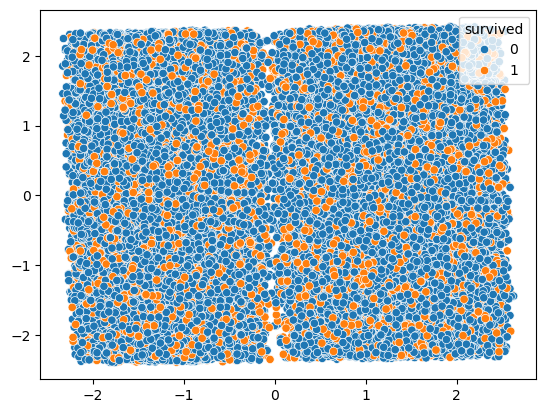

In [147]:
sns.scatterplot(x=X_2D[:,0],y=X_2D[:,1],hue=y_train)

|                            | **Predito 0 (sobrevive)**                       | **Predito 1 (não sobrevive)**               |
| -------------------------- | ----------------------------------------------- | ------------------------------------------- |
| **Real 0 (sobrevive)**     | **TN** (acertos em sobreviver)                  | **FP** (sobreviveu mas foi previsto como 1) |
| **Real 1 (não sobrevive)** | **FN** (não sobreviveu mas foi previsto como 0) | **TP** (acertos em não sobreviver)          |


- nosso objetivo é  minimizar o FN entao a metrica melhor para nosso objetivo é recall

## Random Forest 

In [150]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [151]:
model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10]}

stratified_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_cv,  
    scoring='recall' 
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Mejores parámetros:", grid_search.best_params_)
print("\nReporte de Clasificación (en Test Set):")
print(classification_report(y_test, y_pred))

Mejores parámetros: {'max_depth': 5, 'n_estimators': 50}

Reporte de Clasificación (en Test Set):
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15601
           1       0.00      0.00      0.00      4399

    accuracy                           0.78     20000
   macro avg       0.39      0.50      0.44     20000
weighted avg       0.61      0.78      0.68     20000



/prj/posgrad/samuelrt/mambaforge/envs/tcc/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/prj/posgrad/samuelrt/mambaforge/envs/tcc/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/prj/posgrad/samuelrt/mambaforge/envs/tcc/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [152]:
from sklearn.metrics import confusion_matrix

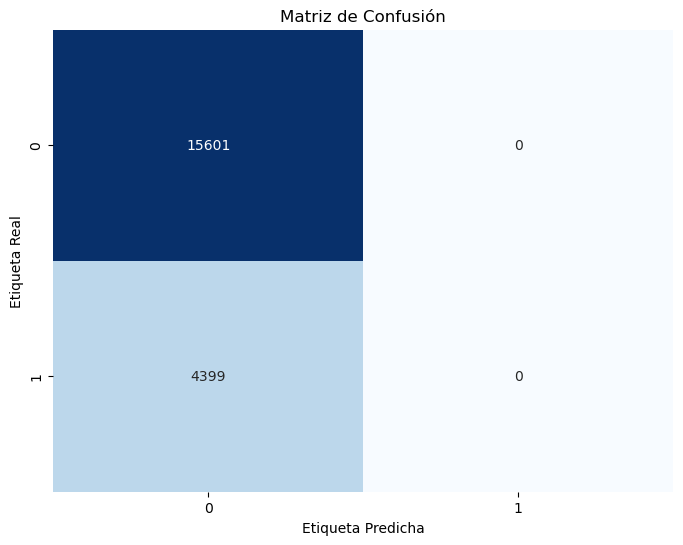

In [153]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

|                            | **Predito 0 (sobrevive)**                       | **Predito 1 (não sobrevive)**               |
| -------------------------- | ----------------------------------------------- | ------------------------------------------- |
| **Real 0 (sobrevive)**     | **TN** (acertos em sobreviver)                  | **FP** (sobreviveu mas foi previsto como 1) |
| **Real 1 (não sobrevive)** | **FN** (não sobreviveu mas foi previsto como 0) | **TP** (acertos em não sobreviver)          |


## SVC

In [157]:

from sklearn.svm import SVC 

In [ ]:
model = SVC(random_state=42) 

param_grid = {
    'C': [0.1, 1],           
    'gamma': ['scale', 0.1, 1],  
    'kernel': ['rbf']      
}

stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_cv,  
    scoring='recall',  
    n_jobs=-1,         
    verbose=1          
)


grid_search.fit(X_train, y_train)  

print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor recall (promedio CV): {grid_search.best_score_:.4f}")

best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_scaled) 

# 8. Métricas de evaluación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


- Avaliação de pelo menos dois modelos diferentes;
- Exploração de hiper-parâmetros se aplicável;
- Utilização de validação cruzada para avaliação de desempenho;
- Justificativa da escolha das métricas de avaliação utilizadas (ex:
acurácia, F1-score, erro quadrático médio, etc.);
- Análise crítica dos resultados obtidos, contemplando, por exemplo, os
seguintes aspectos (os termos ficarão claros durante a disciplina, estão
aqui apenas para ilustrar o que é esperado):
   - O modelo foi adequadamente ajustado?
   - Há indícios de overfitting?
   - Os erros estão distribuídos de forma uniforme entre as
classes/dados? Existem padrões?
   - O que as métricas de avaliação revelam sobre o desempenho?
   - A validação cruzada apresenta comportamento consistente? Existem
partições que se destacam por maior erro?
